<a href="https://colab.research.google.com/github/sudam802/NLP_tutorials/blob/main/youtueb_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


rwmoving the Id and checking the missing values

In [2]:
raw_data=pd.read_csv('Youtube-Spam-Dataset.csv')
df=raw_data.drop('COMMENT_ID',axis=1)
print(df.head())
missing_values = df.isnull().sum()
missing_values
df

             AUTHOR                 DATE  \
0         Julius NM  2013-11-07T06:20:48   
1       adam riyati  2013-11-07T12:37:15   
2  Evgeny Murashkin  2013-11-08T17:34:21   
3   ElNino Melendez  2013-11-09T08:28:43   
4            GsMega  2013-11-10T16:05:38   

                                             CONTENT  \
0  Huh, anyway check out this you[tube] channel: ...   
1  Hey guys check out my new channel and our firs...   
2             just for test I have to say murdev.com   
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4            watch?v=vtaRGgvGtWQ   Check this out .﻿   

                       VIDEO_NAME  CLASS  
0  PSY - GANGNAM STYLE(?????) M/V      1  
1  PSY - GANGNAM STYLE(?????) M/V      1  
2  PSY - GANGNAM STYLE(?????) M/V      1  
3  PSY - GANGNAM STYLE(?????) M/V      1  
4  PSY - GANGNAM STYLE(?????) M/V      1  


,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...
1951,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


plotting the spam vs legitamet

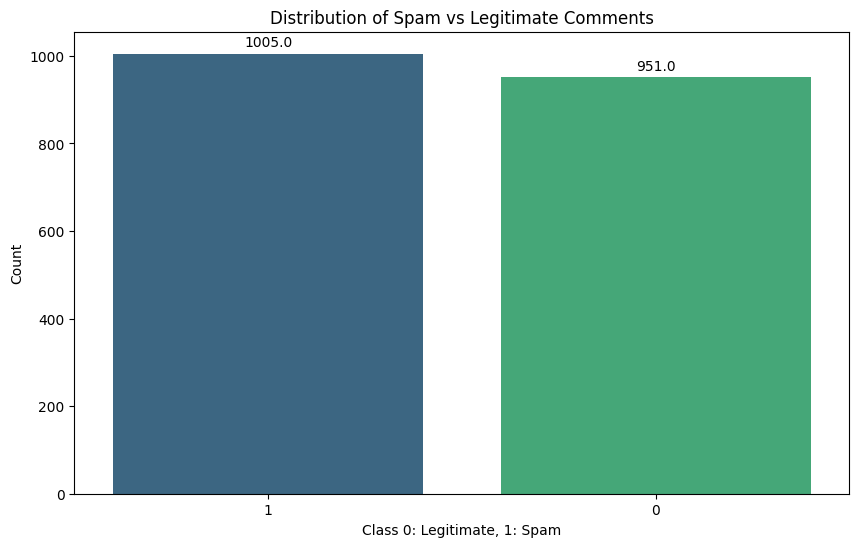

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x=df['CLASS'].astype(str), hue=df['CLASS'].astype(str), palette='viridis')

# Annotate each bar with the exact value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Spam vs Legitimate Comments')
plt.xlabel('Class 0: Legitimate, 1: Spam')
plt.ylabel('Count')

plt.show()

Visualization of the spread of the words

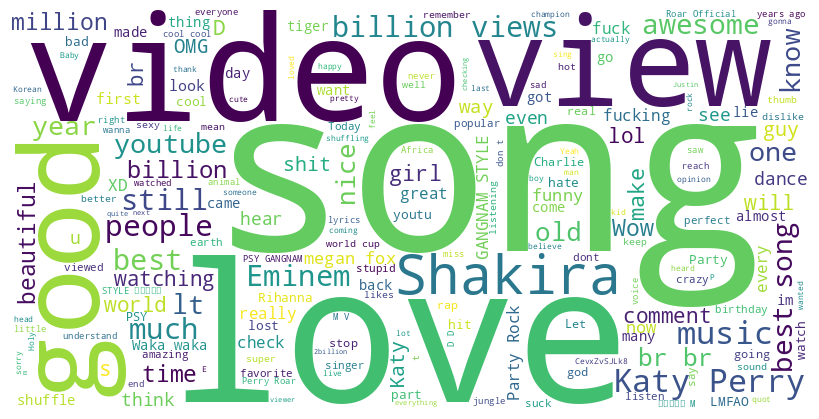

In [4]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df[df['CLASS'] == 0]['CONTENT'])

stopwords=set(STOPWORDS)
# generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

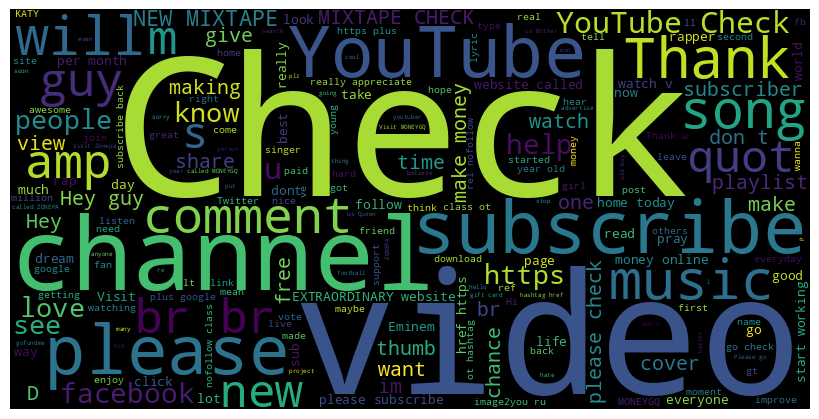

In [5]:
# spam wordcloud
text = ' '.join(df[df['CLASS'] == 1]['CONTENT'])

stopwords=set(STOPWORDS)
# generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

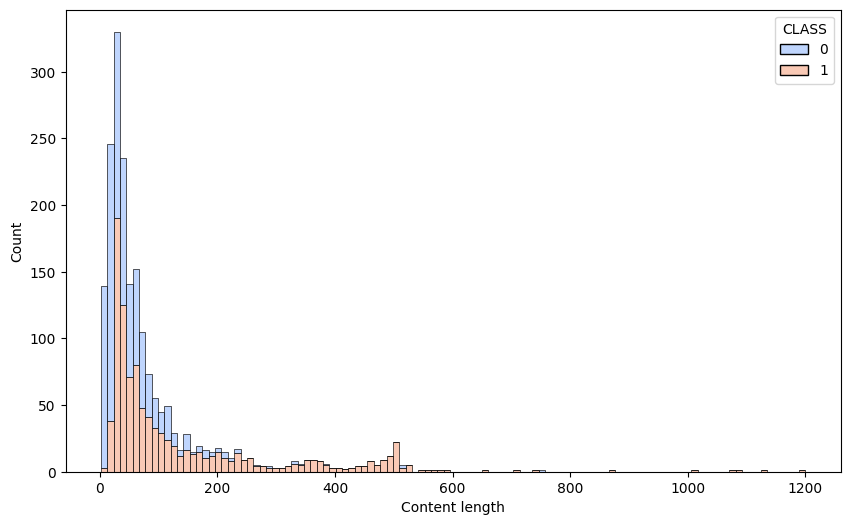

In [6]:
#  adding a new column content length
df['cont_length']=df['CONTENT'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='cont_length', hue='CLASS', multiple='stack', palette='coolwarm')
plt.xlabel('Content length')
plt.ylabel('Count')
plt.show()

In [ ]:
# changing the Date column to data and time object


947


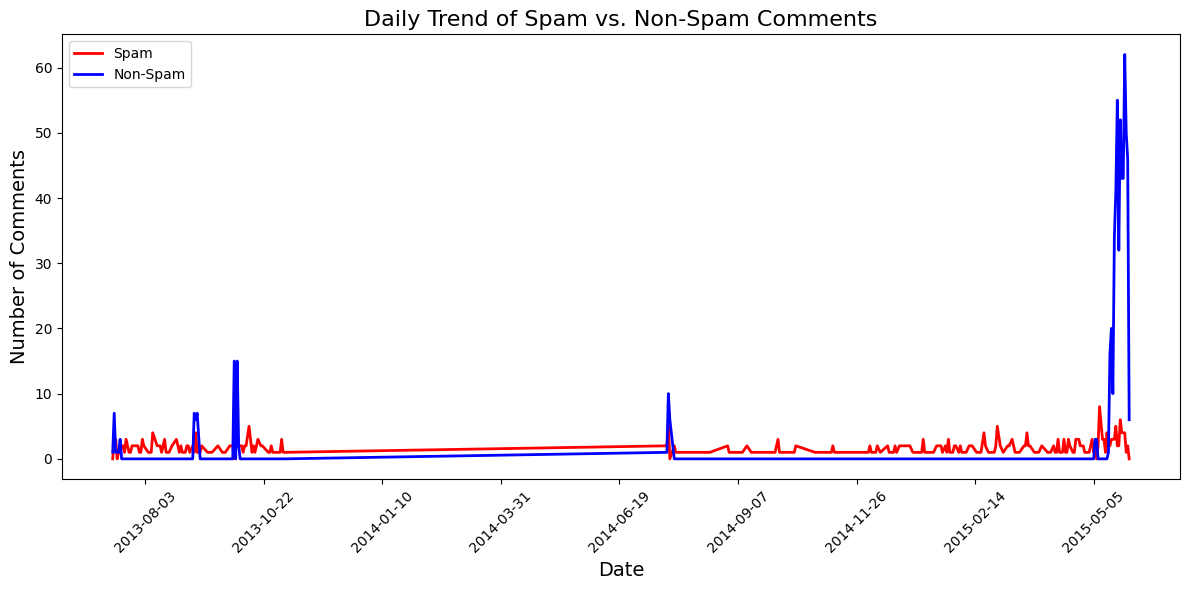

In [24]:
df_copy=df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['DATE'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')
nan_count=df_copy['Date'].dt.date.isna().sum()
print(nan_count)
daily_counts = df_copy.groupby([df_copy['Date'].dt.date, 'CLASS']).size().unstack(fill_value=0)

# Plot the daily trend of spam and non-spam comments
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts[1], label='Spam', color='red', linewidth=2)
plt.plot(daily_counts.index, daily_counts[0], label='Non-Spam', color='blue', linewidth=2)
plt.title('Daily Trend of Spam vs. Non-Spam Comments', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend()

# Show date intervals for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust number of date ticks on x-axis
plt.tight_layout()
plt.show()

2013-11-07 06:20:48
